In [13]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2

import seaborn as sns
#Setting theme
sns.set_theme(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Which model architecture is the best?

In [14]:
# Imports
from hmpinn.plotting import load_model, plot_errors_in_grid
import matplotlib.pyplot as plt
import numpy as np


In [15]:
path_to_data = "../simulation_studies/best_model_architecture/outputs/"
poisson_equations_list = ["eigenfunc", "non_const_BC", "const_source"]
seed_list = [0, 42, 123]
widths = [20, 64, 128]
depths = [1, 2, 3, 4, 5, 6]

In [16]:
def construct_path(width, depth, poisson_equation, seed):
    hidden_layers = str([width]*depth)
    return path_to_data + f"{hidden_layers}_{poisson_equation}_{seed}/"

def compare_models_by_depth(width, seed, mean_threshold=10):

    # Make 1x3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
    fig.suptitle('Loss with respect to the depth of the network', fontsize=16)
    for i in range(3):
        poisson_equation = poisson_equations_list[i]
        mean_errors_list = []
        mean_grad_errors_list = []
        mean_loss_list = []
        mean_BC_loss_list = []
        for depth in depths:
            path = construct_path(width, depth, poisson_equation, seed)
            model, errors, grad_errors, loss, BC_loss = load_model(path)
            mean_errors_list.append(np.mean(errors[-mean_threshold:]))
            mean_grad_errors_list.append(np.mean(grad_errors[-mean_threshold:]))
            mean_loss_list.append(np.mean(loss[-mean_threshold:]))
            mean_BC_loss_list.append(np.mean(BC_loss[-mean_threshold:]))

        axs[i].plot(depths, mean_errors_list, label=f"Error")
        axs[i].plot(depths, mean_grad_errors_list, label=f"Grad error")
        axs[i].plot(depths, mean_loss_list, label=f"Loss")
        axs[i].plot(depths, mean_BC_loss_list, label=f"BC Loss")
        axs[i].scatter(depths, mean_errors_list)
        axs[i].scatter(depths, mean_grad_errors_list)
        axs[i].scatter(depths, mean_loss_list)
        axs[i].scatter(depths, mean_BC_loss_list)
        axs[i].set_title(f"{poisson_equation}")
        axs[i].set_xlabel("Depth")
        axs[i].set_ylabel("Loss")
        axs[i].set_xticks(depths)
        axs[i].set_yscale('log')
        axs[i].legend()

    plt.show()


## Width = 20

For now we will only look at the cases with seed = 0. Later we will see if the choice of seed actually makes a difference

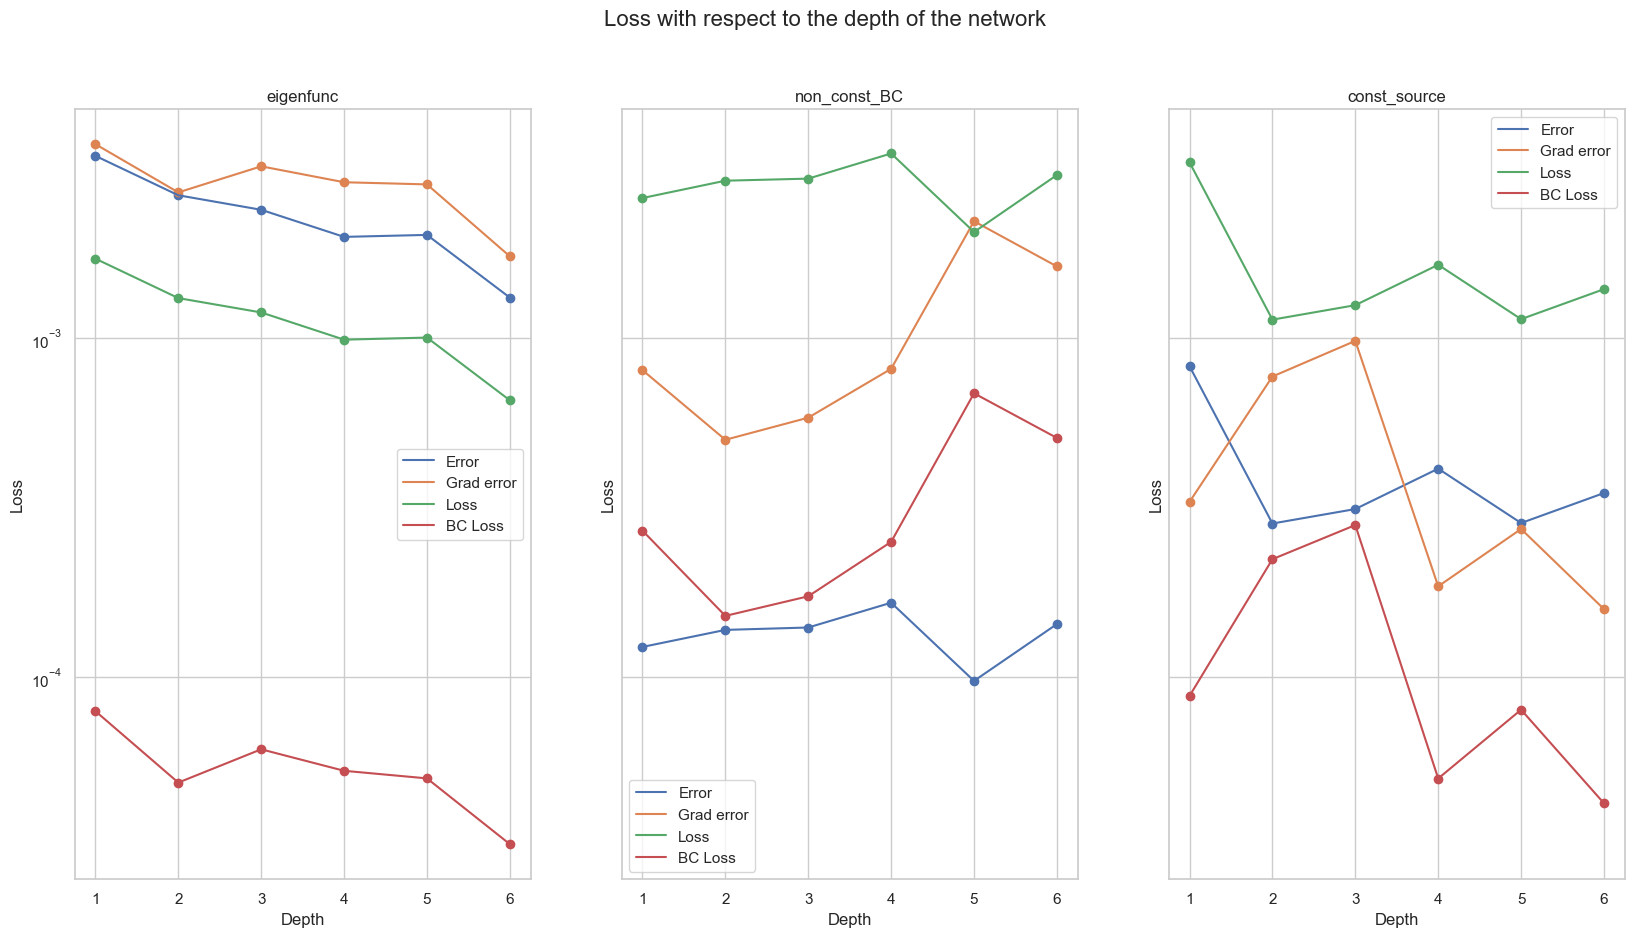

In [17]:
compare_models_by_depth(20,0)        

## Width = 64

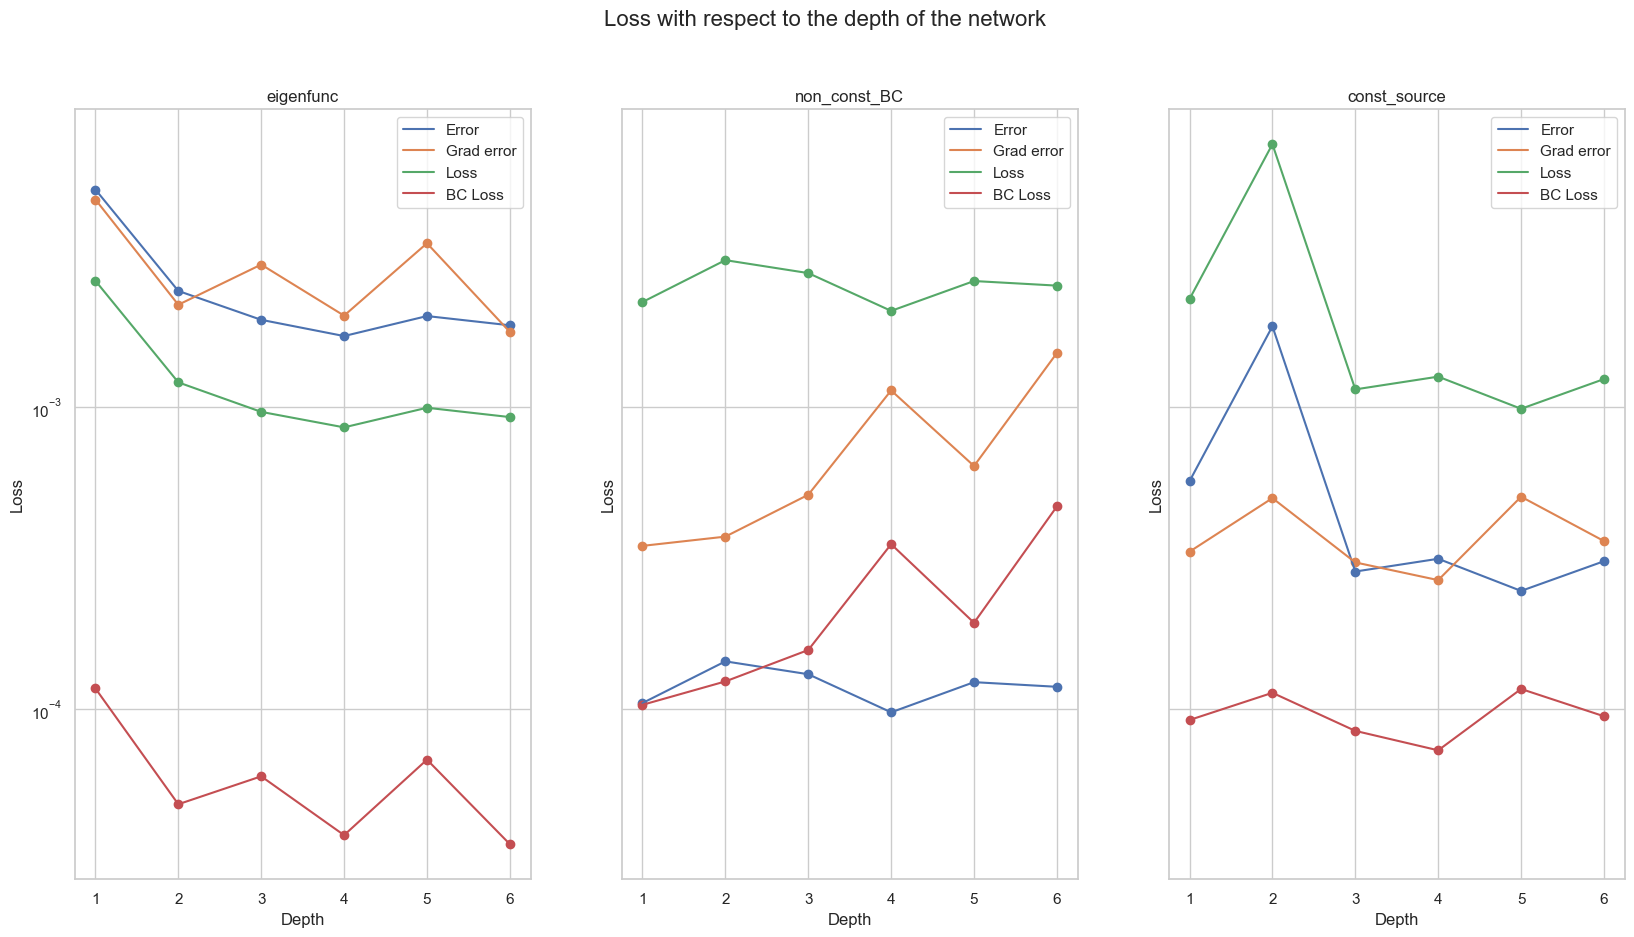

In [18]:
compare_models_by_depth(64, 0)

## Width = 128

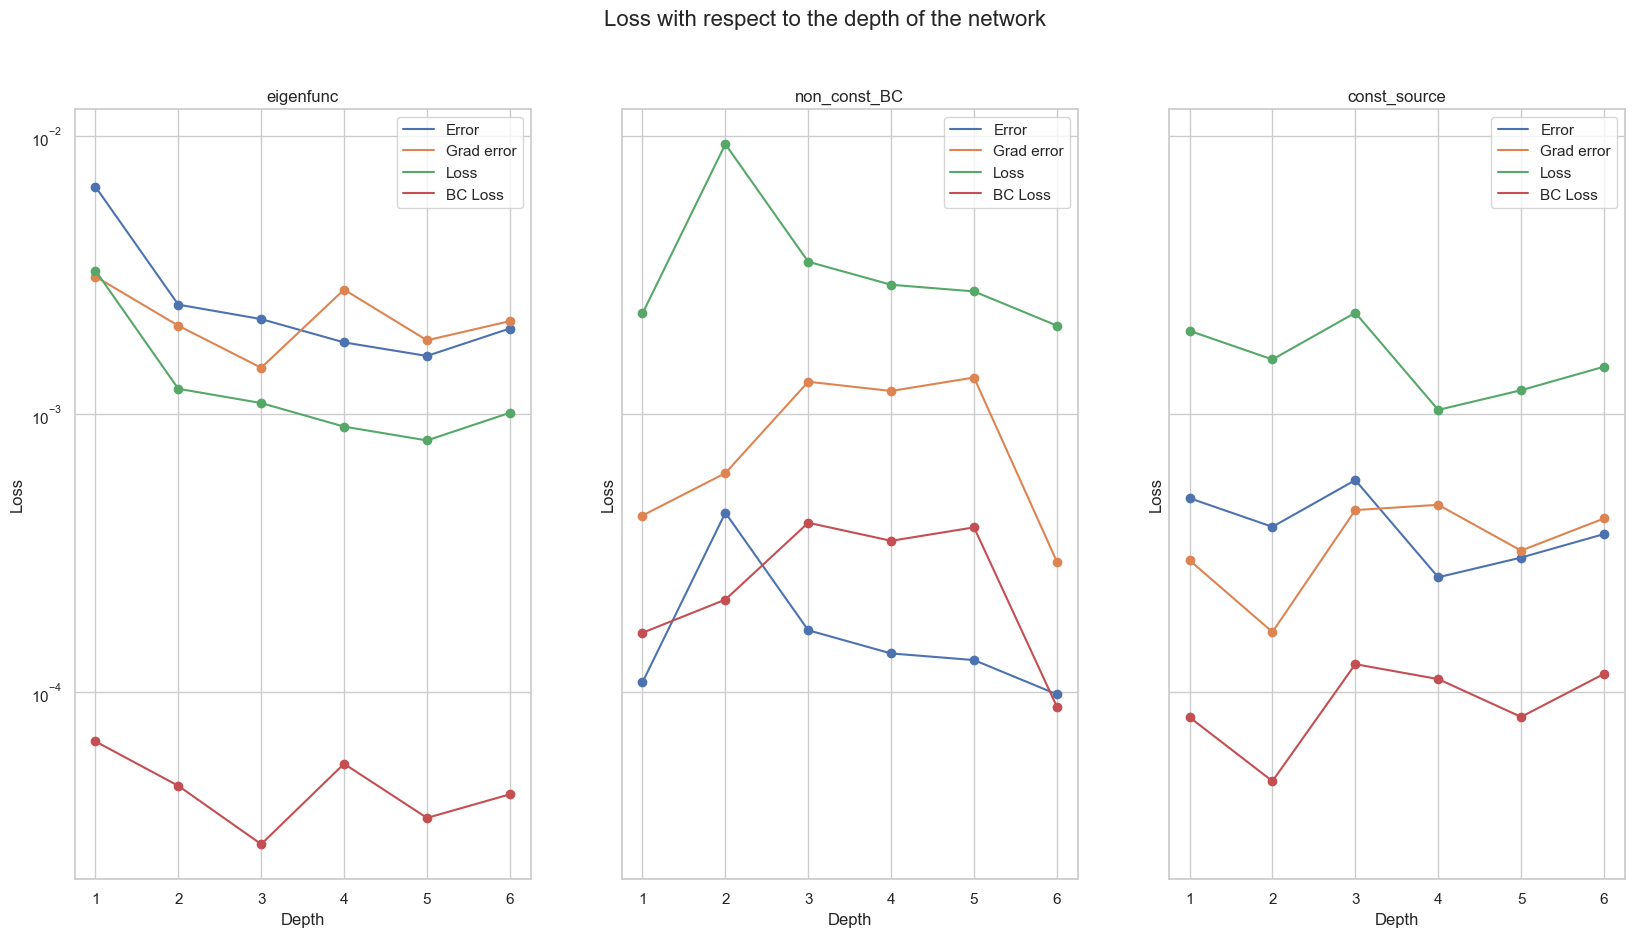

In [19]:
compare_models_by_depth(128, 0)

# Does the seed make a difference

We choose the width to be fixed at 64

In [20]:
width = 64


## Seed = 0

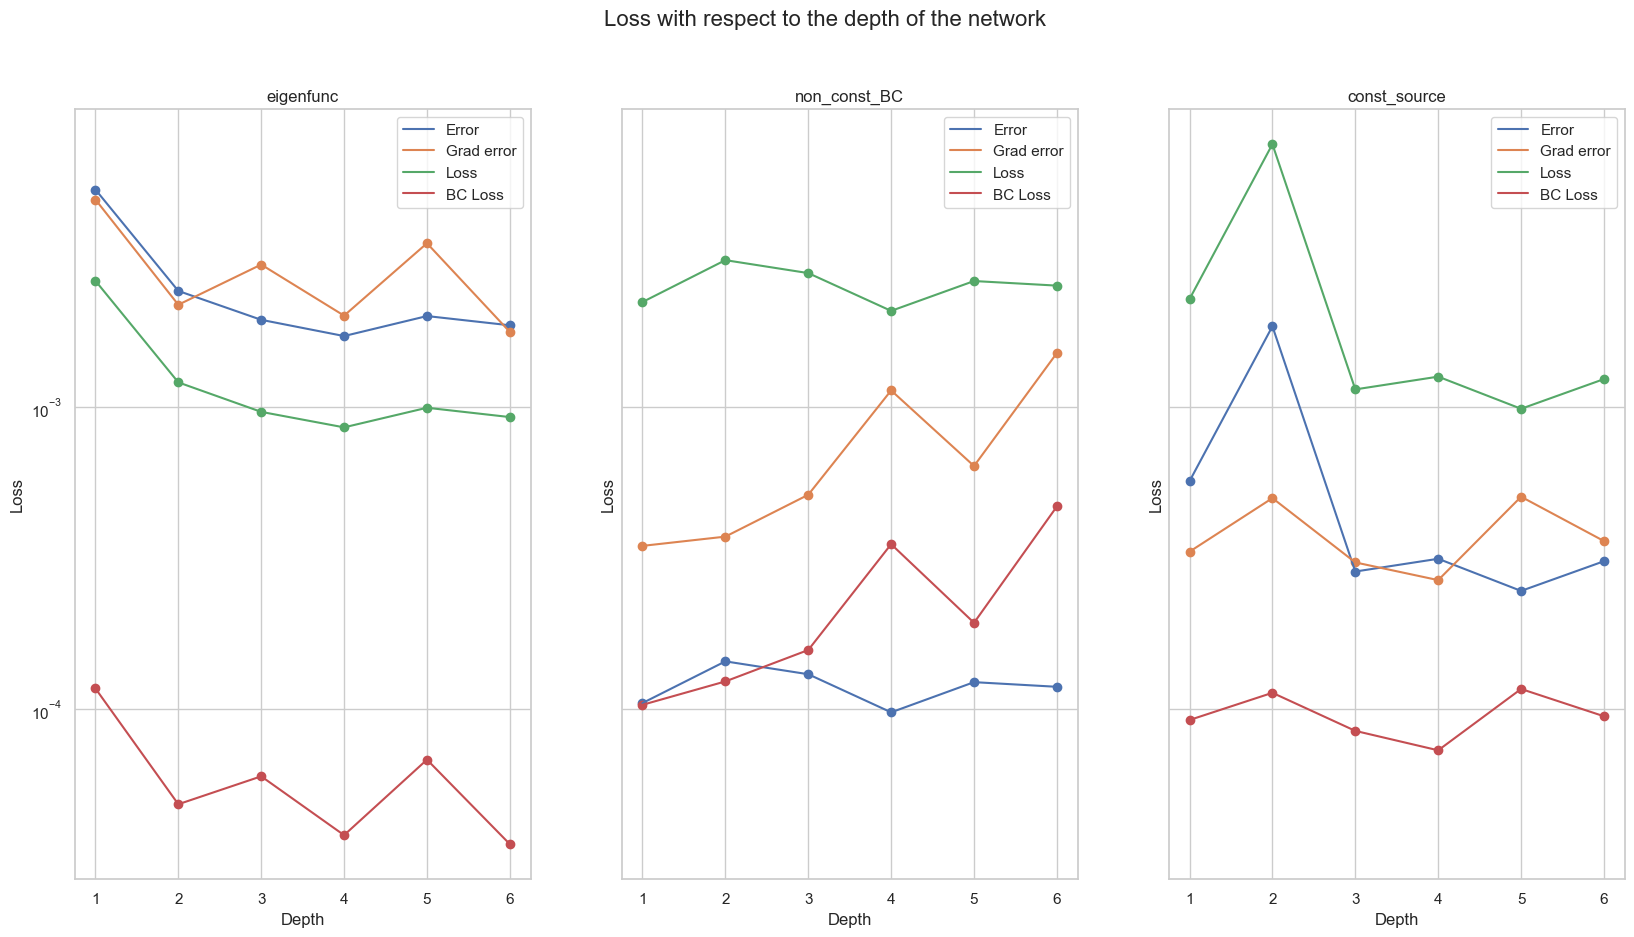

In [21]:
compare_models_by_depth(width, 0)

## Seed = 42

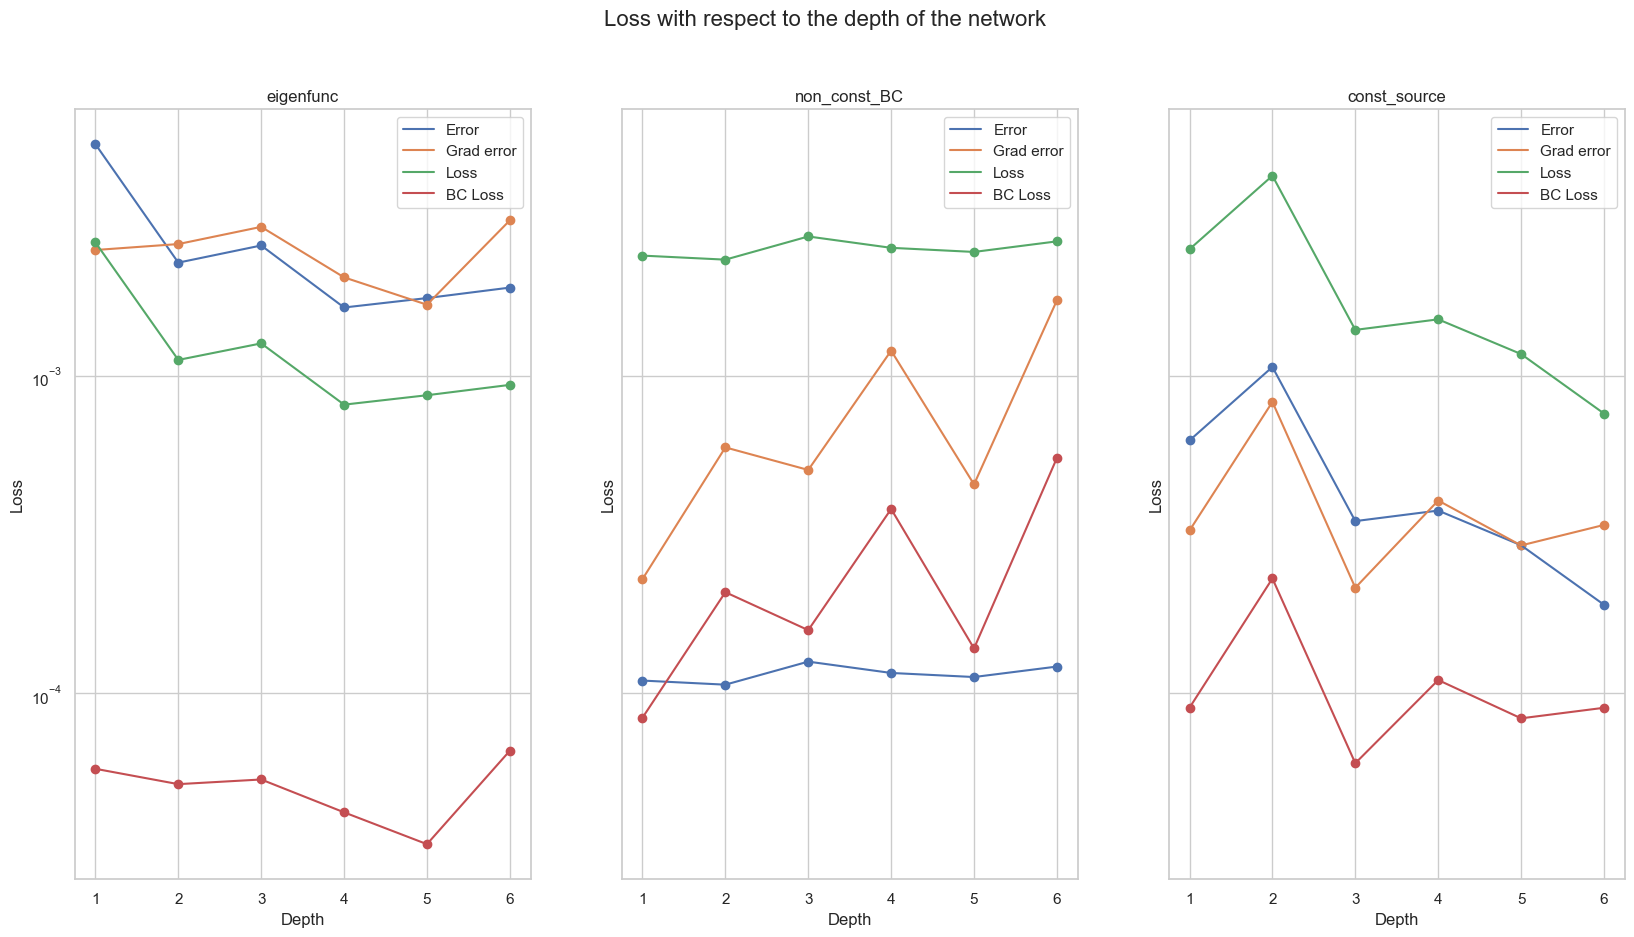

In [22]:
compare_models_by_depth(width, 42)

## Seed = 123

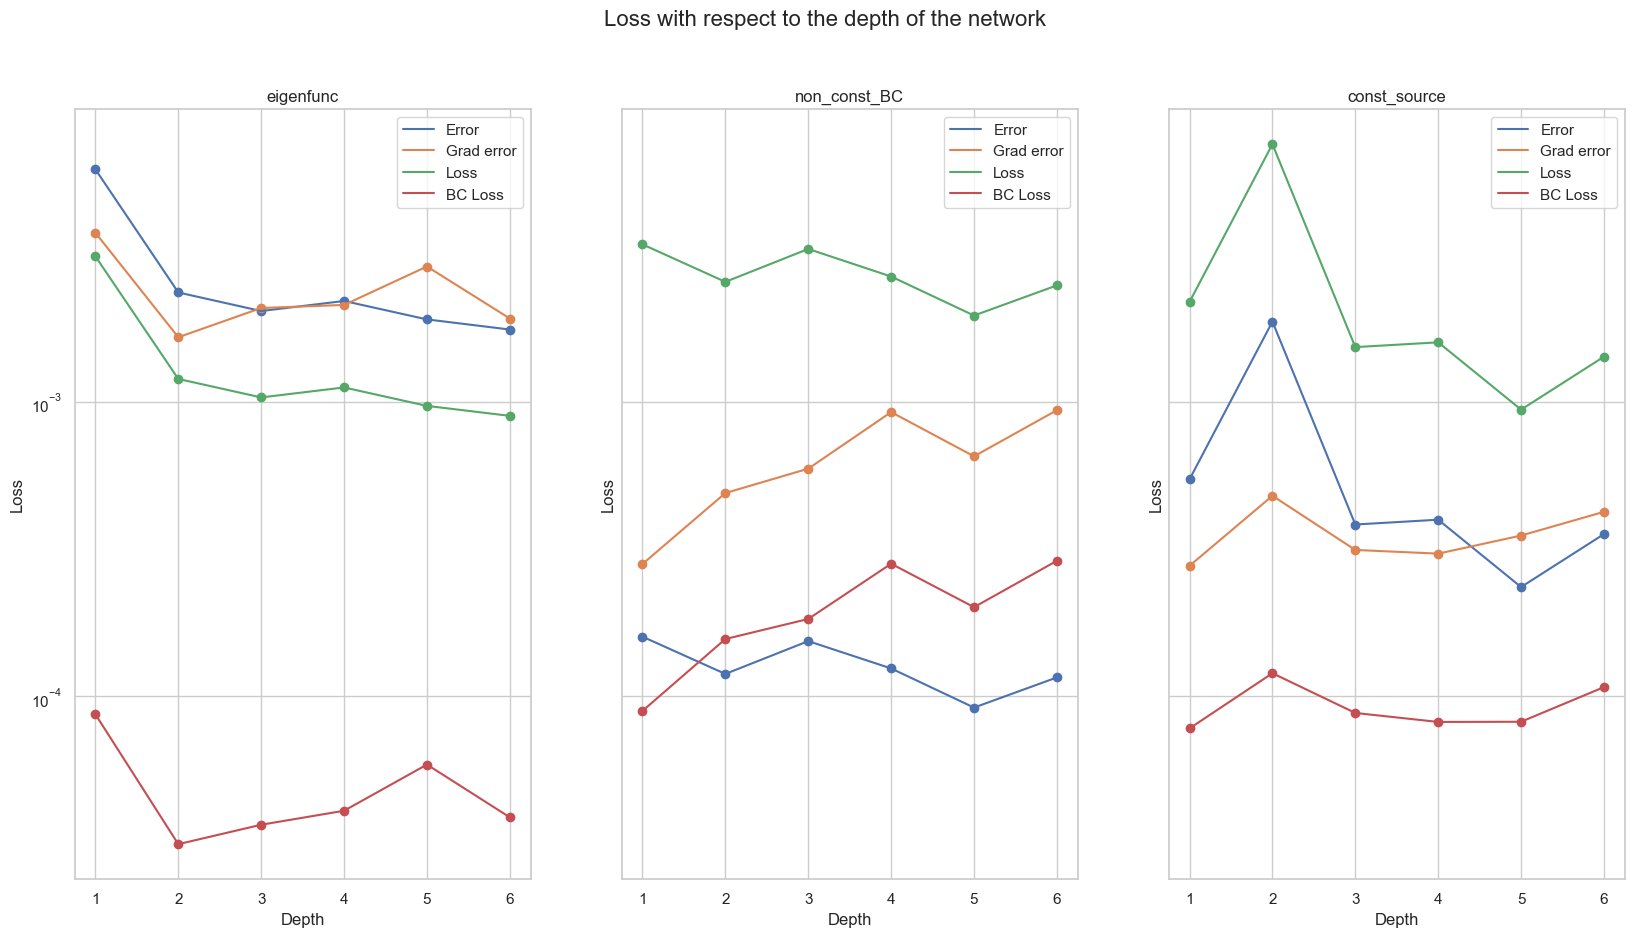

In [23]:
compare_models_by_depth(width, 123)

# Does the activation function make a difference

## Example 1: Eigenfunction

I will try to solve the following poisson problem
\begin{equation}
\Delta u = f(x, y)
\end{equation}

with boundary conditions:

\begin{equation}
u(0, y) = u(1, y) = u(x, 0) = u(x, 1) = 0
\end{equation}

where

\begin{equation}
f(x, y) = -\sin\left(\pi x\right) \sin\left(\pi y\right)
\end{equation}

Clear the analytical solution to this is
\begin{equation}
u(x, y) = \frac{1}{2 \pi^2} \sin\left(\pi x\right) \sin\left(\pi y\right)
\end{equation}

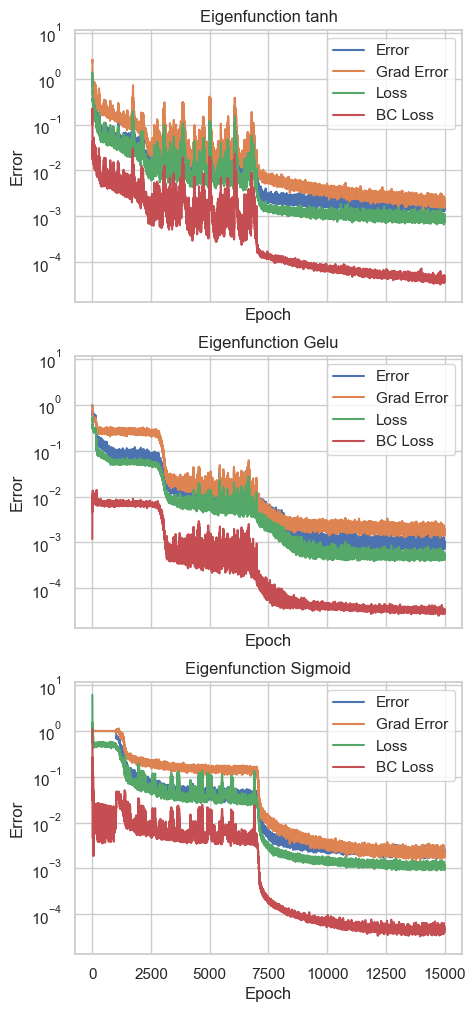

In [24]:
path_list = [
    "../simulation_studies/weakly_enforcing_BC/outputs/1.0_eigenfunc_tanh",
    "../simulation_studies/weakly_enforcing_BC/outputs/1.0_eigenfunc_gelu",
    "../simulation_studies/weakly_enforcing_BC/outputs/1.0_eigenfunc_sigmoid",
]
title_list = ["Eigenfunction tanh", "Eigenfunction Gelu",
              "Eigenfunction Sigmoid"]
plot_errors_in_grid(path_list, number_of_rows=3, number_of_columns=1, title_list=title_list)

## Example 2: Constant source term with complicated boundary condition

The solution \( u(x, y) \) for the Poisson equation
\begin{equation}
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 4
\end{equation}

with the boundary condition

\begin{equation}
u(x, y) = x^2 + y^2
\end{equation}

has analytical solution:

\begin{equation}
u(x, y) = x^2 + y^2
\end{equation}



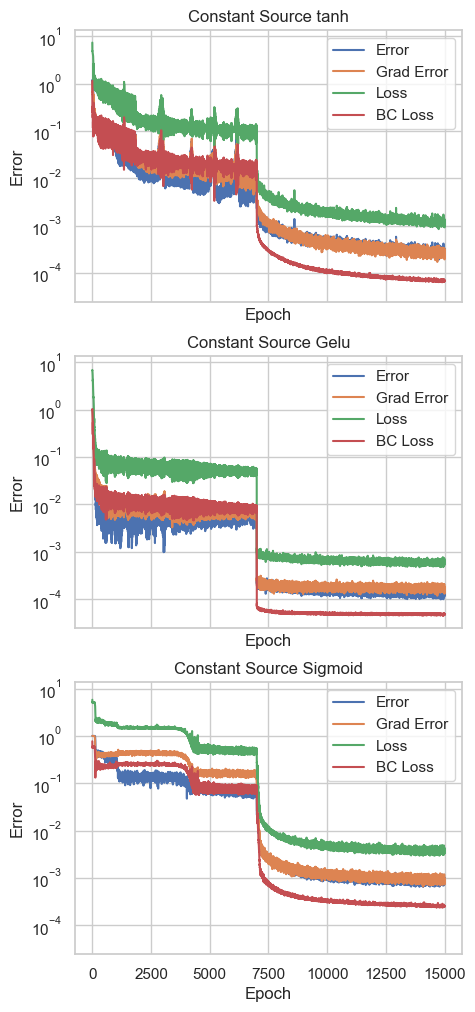

In [25]:
path_list = [
    "../simulation_studies/weakly_enforcing_BC/outputs/8.0_const_source_tanh",
    "../simulation_studies/weakly_enforcing_BC/outputs/8.0_const_source_gelu",
    "../simulation_studies/weakly_enforcing_BC/outputs/8.0_const_source_sigmoid",
]
title_list = ["Constant Source tanh", "Constant Source Gelu", "Constant Source Sigmoid"]
plot_errors_in_grid(path_list, number_of_rows=3, number_of_columns=1, title_list=title_list)